## Universidad del Valle de Guatemala
##### Integrantes
* Juan Manuel Marroquin Alfaro 19845
* Carlos Alberto Raxtúm Ramos 19721
* Jose Abraham Gutierrez Corado 19111
* Walter Danilo Saldaña Salguero 19897
* Javier Alejandro Cotto Argueta 19324

## Investigación de PLN y Sistemas de Recomendación

Primeramente, la base de datos que escogimos esta basada en grabaciones de partidos de futbol de la liga alemana. Donde estos videos estan transcribidos
de forma que cada evento que ocurra en el partido se almacena, junto a su tiempo del evento(en segundo) y con su tipo de evento(pase, perdida/ganancia de posesión,
inicio y fin de la jugada, tiro libre, entre otras más). En base a esto, podemos detectar y reconocer cada tipo de evento que ocurra en un partido, en este caso
detectaremos lo que son los pases.

### Como parte de las tecnicas usadas para el Procesamiento de Lenguaje Natural, existen varias:

- Tokenizar
Esta tecnica consiste en separar cada palabra del texto  en entidades llamadas "tokens", de esta forma tendremos un mejor orden al trabajar con estas. Ademas de ello
a la hora de utilizar esta tecnica, se requiere identificar que utilizaremos como token y que no, por ejemplo contar las mayusculas y minusculas como un token o dos, 
los signos de puntuación seran tokens o no, y asi sucesivamente con cualquier letra o simbolo dentro de nuestras palabras.

- Tagging Part of Speech(PoS)
Esta tecnica se le conoce asi porque practicamente es trabajar las palabras como lo hacemos en la "vida real". Esto se debe a que clasificamos y reconocemos oraciones
mediante separarlas en articulo, verbo, sustantivo, adjetivo, entre otras más.

- Shallow parsing
Esta tecnica combina las dos anteriores, esto se debe a que con cada token obtenido y con cada clasificación hecha mediante PoS, se realiza un arbol que permite a la
computadora, navegar y moverse por el facilitando asi el entendimieno del lenguaje común para formar oraciones y con ellas parrafos.

- Pragmatic Analysis
Esta tecnica es más complicada para implemenetar, pues ademas de las anteriores, se incluye una clasificación de el como se mencionan o dicen las cosas. Esto quiere decir
que la tecnica se basa en interpretar el modo de las palabras, tales como sarcasmo, ironía, etc.

- Bag of Words
Esta tecnica combina el Tokenizar con el uso de matrices. Prácticamente llevara un conteo de las palabras que aparezcan en cierto parrafo mediante los tokens antes recabados.

- word2vec
Esta tecnica creemos que es una de las más eficientes, ya que recaba y memoriza cientos y cientos de palabras utilizadas en diferentes contextos. En base a estas, realiza
matrices de 300 dimensiones, las cuales guardan cada palabra cerca de otras palabras similares y de esta forma crear vocabularios que pueden ser utilizados por la 
computadora para interpretar cualquier parrafo.


# Problema planteado y datos

El problema es que hoy en día, la información y estadísticas de los partidos de fútbol son generados de forma manual por operadores humanos en tiempo real. Por la naturaleza de estos datos, son exclusivos para el uso de los profesionales que generan y por ende son dueños de los mismos datos o para competencias profesionales. Sin embargo, esta data sería muy valiosa para otras aplicaciones como por ejemplo para el fichaje y descrubrimiento de talento jóven, que quizá aún no tengan mucha visibilidad para las grandes organizaciones y por lo tanto no generen sufiecientes datos estadísticos para tener visibilidad y que no pasen por alto.

Para esto se nos pide poder detectar en videos de forma automática los pases en un partido inlcuyendose saques de banda y centros; y enfrentamientos entre jugadores de equipos contrarios en sus diferentes categorías (falta, robo de balón, entre otros), pasa así poder analizar competiciones inexploradas, como ligas juveniles o semiprofesionales o incluso sesiones de entrenamiento para así poder identificar talento oculto.

Los datos obtenidos de los clips de video nos serán de ayuda para entrenar un modelo que logre clasificar los eventos del partido en las categorías indicadas en función del tiempo del partido para así poder identificar los eventos de interes a los solicitados por los fichadores.

### Importar Librearías

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from IPython.display import Video
from pandas_profiling import ProfileReport
from helper import *
%matplotlib inline

### Analisis Exploratorio

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('./videos/train.csv',low_memory=False)
# convert Nan to empty list
df[['event_attributes']] = df[['event_attributes']].fillna('')

####  Cantidad de existencia de cada evento

<AxesSubplot:xlabel='count', ylabel='event'>

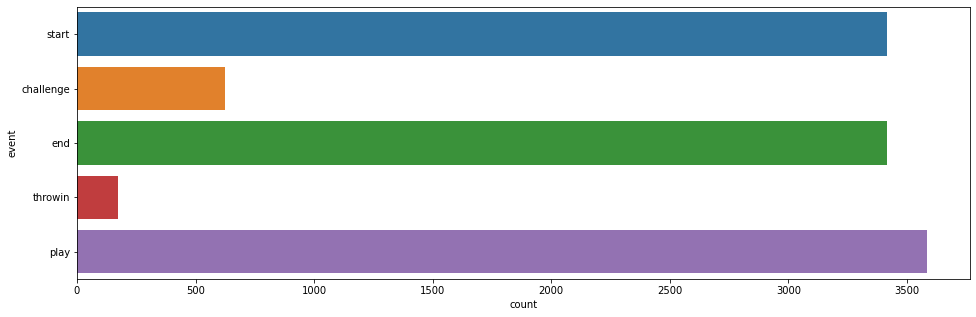

In [4]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, y="event")

#### Muestreo de los eventos en cierto video

<AxesSubplot:xlabel='count', ylabel='video_id'>

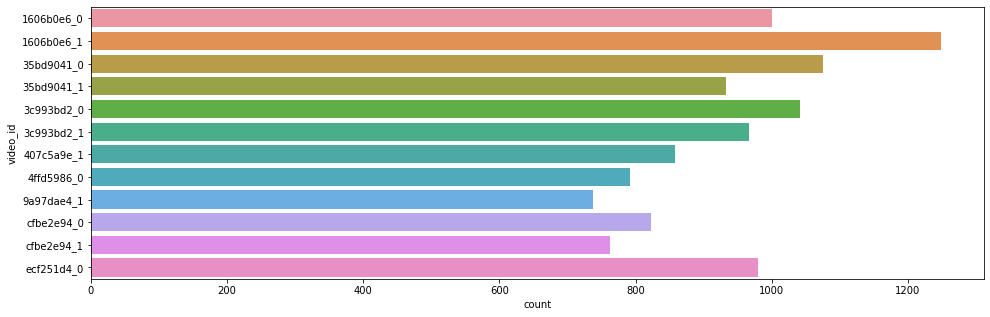

In [5]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, y="video_id")

#### Duración de eventos

<AxesSubplot:xlabel='count', ylabel='video_id'>

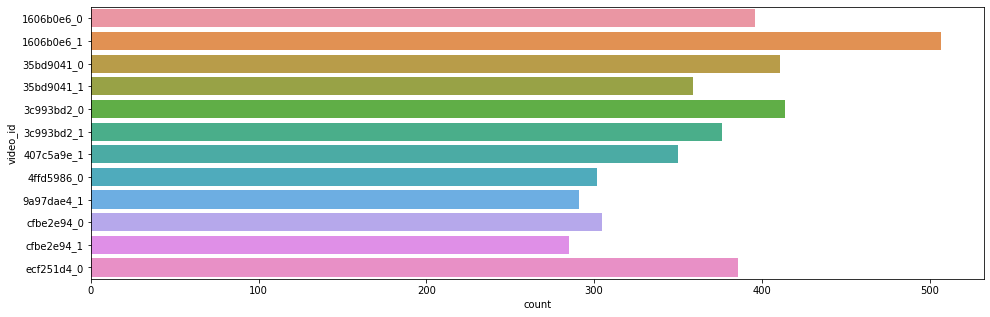

In [6]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df[(df["event"] != "start") & (df["event"] != "end")], y="video_id")

## Eventos existentes en el dataset

### Visualizador de eventos

### Throwing

Un saque de banda se refiere a una situación en la que el juego se reinicia después de que el balón salió de juego por la línea de banda tras el toque del equipo contrario. El balón debe lanzarse con las manos, por detrás y por encima de la cabeza del jugador ejecutor.

In [7]:
df_throwin = df[df["event"] == "throwin"].reset_index()

Visualización de los eventos que perteneces a Throwing

<AxesSubplot:xlabel='count', ylabel='event_attributes'>

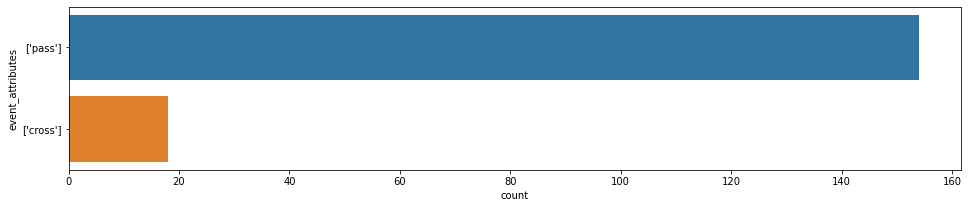

In [8]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_throwin, y="event_attributes")

Visualización de los eventos que perteneces a Throwing según el ID del video

<AxesSubplot:xlabel='video_id', ylabel='count'>

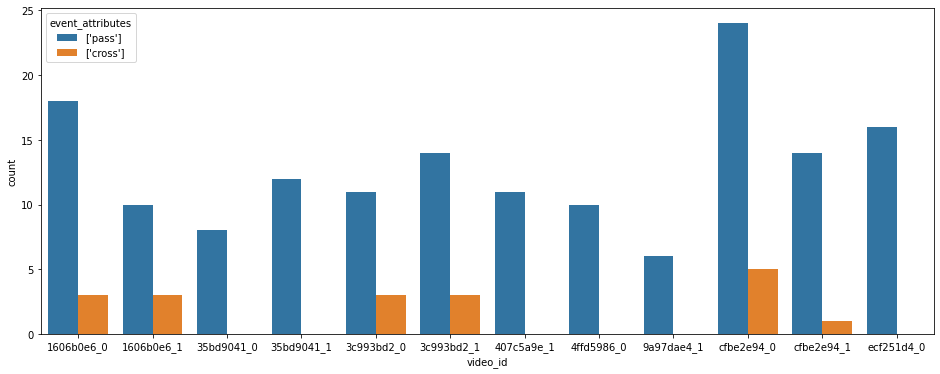

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_throwin, x="video_id", hue="event_attributes")

#### Pase

Definido como cualquier intento de cambiar el control del balón a otro miembro del equipo que no satisface la definición cruzada.

In [10]:
create_video(df_throwin.iloc[0],'throwin')

['pass']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Centro/ Cross

El hecho de que una jugada sea una centro depende de las posiciones del jugador que actúa y del posible destinatario. El jugador que juega el centro debe estar ubicado aprox. dentro de una de las cuatro zonas de cruce. Las cuatro zonas están delimitadas por las líneas de banda, la prolongación del área penal, las líneas de meta y los cuartos de cancha imaginarios, que se trazarían a una cuarta parte de la longitud del terreno de juego paralelas a la línea de mitad de cancha (ver la siguiente figura). El posible destinatario del centro debe estar ubicado aprox. dentro del área penal. Además, la distancia de la pelota jugada debe ser de longitud media (de 10 a 30 metros) o larga (más de 30 metros) y la altura de la pelota jugada debe ser alta (se juega por encima de la altura de la rodilla). Para clasificar una pelota jugada como un centro si la pelota es bloqueada por un jugador contrario, no es decisiva la altura real o la distancia recorrida, sino la altura o distancia prevista.

In [11]:
create_video(df_throwin.iloc[2],'throwin')

['cross']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Play

Una jugada describe el intento de un jugador de cambiar el control del balón a otro miembro de su equipo. Un evento de juego puede ejecutarse como pase o como centro.

Visualización de los eventos que perteneces a Open Play

In [12]:
df_play = df[df["event"] == "play"].reset_index()

<AxesSubplot:xlabel='count', ylabel='event_attributes'>

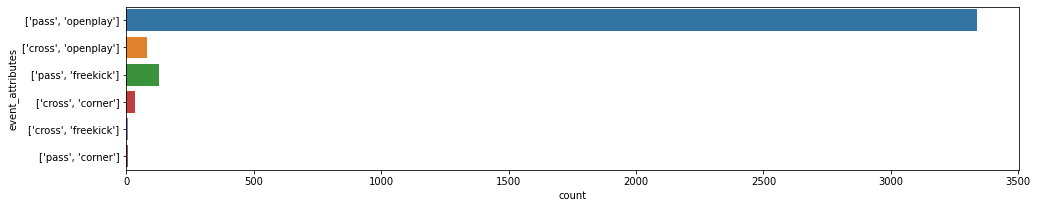

In [13]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_play, y="event_attributes")

<AxesSubplot:xlabel='video_id', ylabel='count'>

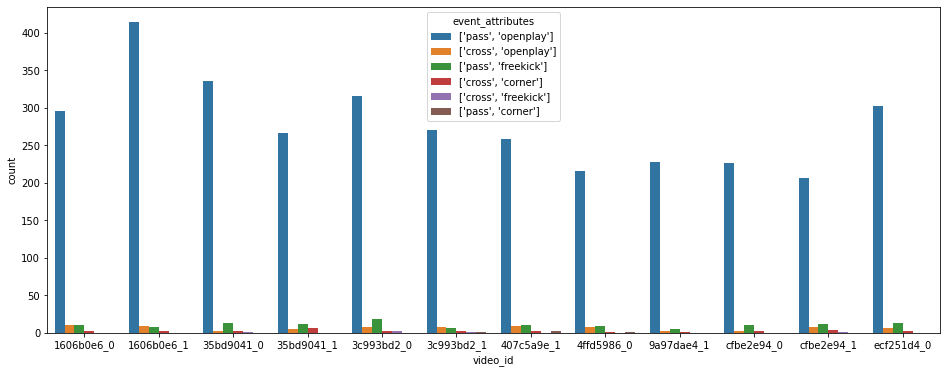

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_play, x="video_id", hue="event_attributes")

In [15]:
df_play.head()

,index,video_id,time,event,event_attributes
0,10,1606b0e6_0,224.43,play,"['pass', 'openplay']"
1,13,1606b0e6_0,229.39,play,"['pass', 'openplay']"
2,16,1606b0e6_0,236.71,play,"['pass', 'openplay']"
3,17,1606b0e6_0,239.35,play,"['pass', 'openplay']"
4,20,1606b0e6_0,242.39,play,"['pass', 'openplay']"


#### Jugada/ Open play

Una jugada abierta se refiere a cualquier jugada que se ejecuta en juego y no en una situación de balón muerto (como un saque de esquina, un tiro libre o cualquier otra jugada a balón parado).

#### Pass and Open play

In [16]:
create_video(df_play.iloc[0],'play',before=2, after=2)

['pass', 'openplay']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Cross and Open play

In [17]:
create_video(df_play.iloc[15], 'play',before=2, after=2)

['cross', 'openplay']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Pass and free kick

Un Free Kick se refiere a una situación en la que se ejecuta la jugada para reiniciar el juego después de que el árbitro lo detuvo debido a una infracción de las reglas. La pelota debe patearse y estar estacionaria en el suelo cuando se patea.

In [18]:
create_video(df_play.iloc[27], 'play',before=2, after=2)

['pass', 'freekick']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Cross and free kick

In [19]:
create_video(df_play.iloc[1105], 'play',before=2, after=2)

['cross', 'freekick']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Pass and Corner

Un saque de esquina se refiere a una situación en la que se ejecuta la jugada para reiniciar el juego después de que el balón salió de juego sobre la línea de gol tras el toque del jugador del equipo defensor. La pelota debe patearse desde la esquina más cercana del campo y debe estar estacionaria en el suelo cuando se patea.

In [20]:
create_video(df_play.iloc[1955], 'play',before=2, after=2)

['pass', 'corner']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Cross and Corner

In [21]:
create_video(df_play.iloc[108], 'play',before=2, after=2)

['cross', 'corner']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Challenge

Un desafío es una acción de un jugador durante la cual dos jugadores de equipos opuestos son físicamente capaces de obtener o recibir el control del balón e intentan hacerlo. Un Desafío requiere que uno de los dos jugadores toque la pelota o cometa una falta al jugador contrario.

In [22]:
df_challenge = df[df["event"] == "challenge"].reset_index()

<AxesSubplot:xlabel='count', ylabel='event_attributes'>

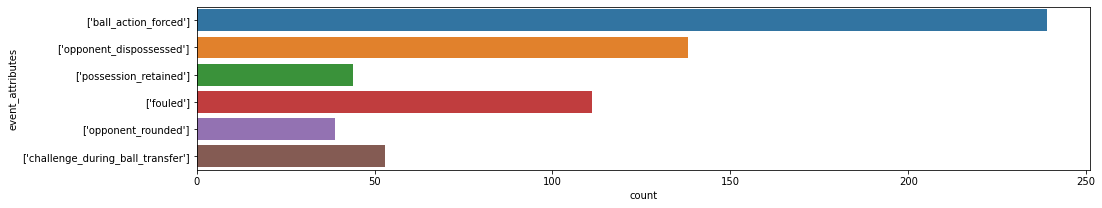

In [23]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_challenge, y="event_attributes")

<AxesSubplot:xlabel='video_id', ylabel='count'>

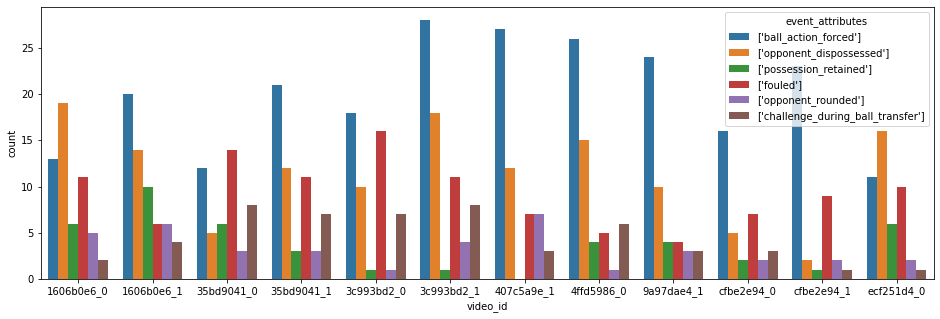

In [24]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df_challenge, x="video_id", hue="event_attributes")

In [25]:
df_challenge["event_attributes"].value_counts()

['ball_action_forced']                239
['opponent_dispossessed']             138
['fouled']                            111
['challenge_during_ball_transfer']     53
['possession_retained']                44
['opponent_rounded']                   39
Name: event_attributes, dtype: int64

In [26]:
for i, x in df_challenge.iterrows():
    if x["event_attributes"] == "['possession_retained']":
        print(i, x)
        break

2 index                                    59
video_id                         1606b0e6_0
time                                 300.99
event                             challenge
event_attributes    ['possession_retained']
Name: 2, dtype: object


#### Opponent Rounded

un jugador con control del balón permanece con el control del balón después del desafío, habiendo dejado atrás al jugador contrario. Las situaciones en las que el oponente no puede obtener la posesión (p. ej., cuando el balón se “sacude” por encima del oponente) también se registrarán como desafíos.

In [27]:
create_video(df_challenge.iloc[11], 'challenge',before=3, after=3)

['opponent_rounded']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Ball Action Forced

se aplica cuando ninguno de los jugadores involucrados en el desafío tiene el control del balón al comienzo del desafío (por ejemplo, desafíos aéreos, desafíos para el primer toque de balón) y un jugador determina la dirección del balón en el final del reto.

In [28]:
create_video(df_challenge.iloc[0], 'challenge',before=3, after=3)

['ball_action_forced']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Fouled

Accion que termina con falta

In [29]:
create_video(df_challenge.iloc[8], 'challenge',before=3, after=3)

['fouled']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


#### Opponent Dispossessed

Un jugador que no tiene el control del balón desposee al jugador contrario que tiene el control del balón.

In [30]:
create_video(df_challenge.iloc[1], 'challenge',before=3, after=3)

['opponent_dispossessed']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Challenge During Ball Transfer

Se aplica cuando los tiros o las pelotas jugadas son forzadas o bloqueadas durante los desafíos. Solo se registra un desafío si la pelota jugada o el tiro viajan a través del área que el jugador defensor está tratando de cubrir desde una perspectiva táctica. Todos los demás casos no se registran como impugnaciones.

In [31]:
create_video(df_challenge.iloc[45], 'challenge',before=3, after=3)

['challenge_during_ball_transfer']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Possession Retained

Se aplica cuando uno de los jugadores que participan en el desafío tiene cierto control del balón al inicio del desafío y logra retenerlo, a pesar de los esfuerzos por despojarlo del oponente involucrado en el desafío.

In [32]:
create_video(df_challenge.iloc[2], 'challenge',before=3, after=3)

['possession_retained']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [34]:
with open("videos/play/test_10.mp4", "rb") as file:
    byte = file.read() # read a byte (a single character in text)
    print(byte[:10])
    print(str(byte[:10]))

b'\x00\x00\x00 ftypis'
b'\x00\x00\x00 ftypis'


In [35]:
def convert_to_binary(video):
    f = f"./videos/train/{video}.mp4"
    with open(f, "rb") as file:
        byte = file.read() # read a byte (a single character in text)
        #print(byte[:10])
        print(str(byte[:10]))
        return str(byte)

In [ ]:
df.head()

In [37]:
df_play.head(60)

,index,video_id,time,event,event_attributes
0,10,1606b0e6_0,224.43,play,"['pass', 'openplay']"
1,13,1606b0e6_0,229.39,play,"['pass', 'openplay']"
2,16,1606b0e6_0,236.71,play,"['pass', 'openplay']"
3,17,1606b0e6_0,239.35,play,"['pass', 'openplay']"
4,20,1606b0e6_0,242.39,play,"['pass', 'openplay']"
5,21,1606b0e6_0,244.59,play,"['pass', 'openplay']"
6,24,1606b0e6_0,248.11,play,"['pass', 'openplay']"
7,27,1606b0e6_0,250.75,play,"['pass', 'openplay']"
8,28,1606b0e6_0,253.47,play,"['pass', 'openplay']"
9,31,1606b0e6_0,256.83,play,"['pass', 'openplay']"


In [5]:
import cv2
import os
import numpy as np

In [6]:
vidcap = cv2.VideoCapture('./videos/play/test_10.mp4')
success,image = vidcap.read()
count = 0
success = True
idx = 0

In [7]:
vidcap.ce

< cv2.VideoCapture 00000274531B06B0>

In [13]:
import cv2
import os
import numpy as np

#Reading the video
vidcap = cv2.VideoCapture('./videos/play/test_10.mp4')
success,image = vidcap.read()
count = 0
success = True
idx = 0
frame_width = int(vidcap.get(3))
frame_height = int(vidcap.get(4))
   
size = (frame_width, frame_height)
result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'),10, size)
#Read the video frame by frame
while success:
    #result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'),10, size)
	#converting into hsv image
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    #hsv = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
	#green range
    lower_green = np.array([40,40, 40])
    upper_green = np.array([70, 255, 255])
	#blue range
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

	#Red range
    lower_red = np.array([0,31,255])
    upper_red = np.array([176,255,255])

	#white range
    lower_white = np.array([0,0,0])
    upper_white = np.array([0,0,255])
    
    #Define a mask ranging from lower to uppper
    mask = cv2.inRange(hsv, lower_green, upper_green)
    #Do masking
    res = cv2.bitwise_and(image, image, mask=mask)
	#convert to hsv to gray
    res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
    res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)

    #Defining a kernel to do morphological operation in threshold image to 
    #get better output.
    kernel = np.ones((13,13),np.uint8)
    thresh = cv2.threshold(res_gray,127,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
	

    #find contours in threshold image     
	#im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    prev = 0
    font = cv2.FONT_HERSHEY_SIMPLEX
	
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
		
		#Detect players
        if(h>=(1.5)*w):
            if(w>15 and h>= 15):
                idx = idx+1
                player_img = image[y:y+h,x:x+w]
                player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
                #If player has blue jersy
                mask1 = cv2.inRange(player_hsv, lower_blue, upper_blue)
                res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
                res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
                res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
                nzCount = cv2.countNonZero(res1)
                #If player has red jersy
                mask2 = cv2.inRange(player_hsv, lower_red, upper_red)
                res2 = cv2.bitwise_and(player_img, player_img, mask=mask2)
                res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
                res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
                nzCountred = cv2.countNonZero(res2)

                if(nzCount >= 20):
                    #Mark blue jersy players as france
                    cv2.putText(image, 'WHITE TEAM', (x-2, y-2), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
                    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
                else:
                    pass
                if(nzCountred>=20):
                    #Mark red jersy players as belgium
                    cv2.putText(image, 'RED TEAM', (x-2, y-2), font, 0.8, (0,0,255), 2, cv2.LINE_AA)
                    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
                else:
                    pass
        if((h>=1 and w>=1) and (h<=30 and w<=30)):
            player_img = image[y:y+h,x:x+w]
		
            player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
            #white ball  detection
            mask1 = cv2.inRange(player_hsv, lower_white, upper_white)
            res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
            res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
            res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
            nzCount = cv2.countNonZero(res1)
	

            if(nzCount >= 3):
                # detect football
                cv2.putText(image, 'football', (x-2, y-2), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)


    #cv2.imwrite("./videos/img/frame%d.jpg" % count, res)
    print('Read a new frame: ', success)     # save frame as JPEG file	
    count += 1
    cv2.imshow('Match Detection',image)
    result.write(image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    success,image = vidcap.read()
    
vidcap.release()
cv2.destroyAllWindows()

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame